In [1]:
import numpy as np

In [2]:
def func(x):
    return (x[0]**2 - x[1])**2 + (1-x[0])**2

def gradient_func(x):
    df_dx1 = 2 * (x[0] ** 2 - x[1]) * 2 * x[0] - 2 * (1 - x[0])
    df_dx2 = 2 * (x[0] ** 2 - x[1]) * (-1)
    return np.array([df_dx1, df_dx2])

$\mathbf{H}_{new} = \left(\mathbf{I} - \frac{\mathbf{s}_k \mathbf{y}_k^T}{\mathbf{y}_k^T \mathbf{s}_k}\right) \mathbf{H} \left(\mathbf{I} - \frac{\mathbf{y}_k \mathbf{s}_k^T}{\mathbf{y}_k^T \mathbf{s}_k}\right) + \frac{\mathbf{s}_k \mathbf{s}_k^T}{\mathbf{y}_k^T \mathbf{s}_k}$

In [3]:
def golden_section_search(func, a, b, tol=1e-5):
    golden_ratio = (np.sqrt(5) - 1) / 2
    c = b - golden_ratio * (b - a)
    d = a + golden_ratio * (b - a)
    while abs(c - d) > tol:
        if func(c) < func(d):
            b = d
        else:
            a = c
        c = b - golden_ratio * (b - a)
        d = a + golden_ratio * (b - a)
    return (b + a) / 2

def dfp(f, x_start, max_iter=1000, tol=1e-8):
    global path_points
    
    n = len(x_start)
    I = np.eye(n)
    H = I
    x_k = np.array(x_start)
    g_k = gradient_func(x_k)
    
    for k in range(max_iter):
        p_k = -np.dot(H, g_k)

        alpha_min, alpha_max = 0, 5
        alpha = golden_section_search(lambda alpha: func(x_k + alpha * p_k), alpha_min, alpha_max)
        x_new = x_k + alpha * p_k
        
        g_new = gradient_func(x_new)
        
        s_k = x_new - x_k
        y_k = g_new - g_k
        rho_k = 1 / np.dot(y_k, s_k)
        term1 = I - np.outer(s_k, y_k * rho_k)
        term2 = I - np.outer(y_k, s_k * rho_k)
        H = np.dot(np.dot(term1, H), term2) + np.outer(s_k, s_k) * rho_k
        
        if np.linalg.norm(g_new) < tol:
            print(f"Converged after {k+1} iterations.")
            break
        
        x_k = x_new
        g_k = g_new

        path_points.append(x_new.copy())  # for drawing
    return x_new, f(x_new)

initial_point = np.array([-0.5, -0.5])
path_points = [initial_point.copy()]
x_opt, f_opt = dfp(func, initial_point)
print(f"Optimized parameters: {x_opt}")
print(f"Minimum value: {f_opt}")

Converged after 8 iterations.
Optimized parameters: [1. 1.]
Minimum value: 9.007104004033575e-22


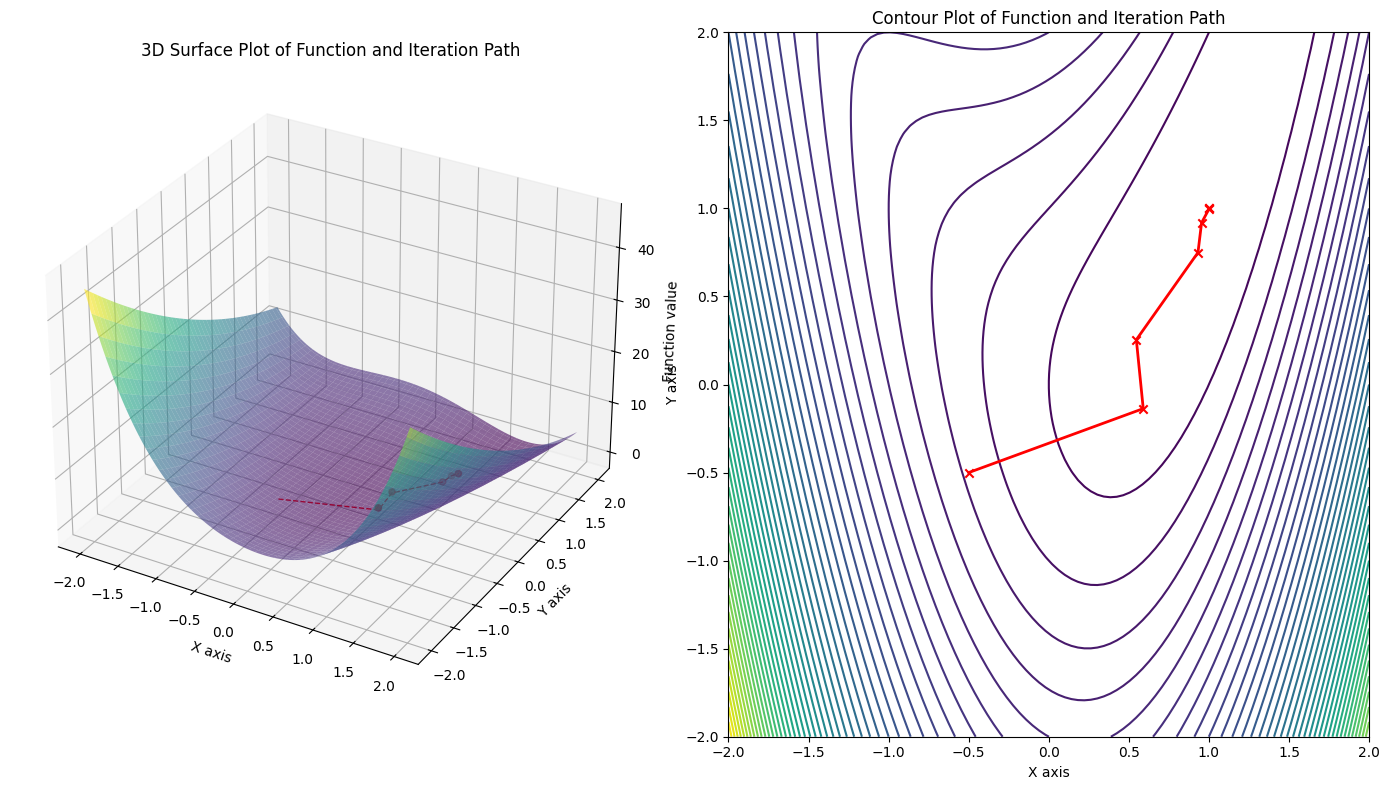

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_iterations(func, path_points):
    fig = plt.figure(figsize=(14, 8))
    
    # 3d
    ax1 = fig.add_subplot(121, projection='3d')
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(y)):
            Z[j, i] = func([X[j, i], Y[j, i]])
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
    ax1.scatter([p[0] for p in path_points][1:], [p[1] for p in path_points][1:], [func(p) for p in path_points][1:], c='r', marker='o')
    ax1.plot([p[0] for p in path_points], [p[1] for p in path_points], 'r--', lw=1)
    ax1.set_xlabel('X axis')
    ax1.set_ylabel('Y axis')
    ax1.set_zlabel('Function value')
    ax1.set_title('3D Surface Plot of Function and Iteration Path')

    # 2d
    ax2 = fig.add_subplot(122)
    ax2.contour(X, Y, Z, 50, cmap='viridis')
    ax2.scatter([p[0] for p in path_points], [p[1] for p in path_points], c='r', marker='x')
    ax2.plot([p[0] for p in path_points], [p[1] for p in path_points], 'r-', lw=2)
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_title('Contour Plot of Function and Iteration Path')
    
    plt.tight_layout()
    plt.savefig("./result.jpg", dpi=1500)
    plt.show()

# draw
plot_iterations(func, path_points)